In [1]:
R.version.string

[1] "R version 4.2.2 Patched (2022-11-10 r83330)"

In [2]:
install.packages('reshape2')
install.packages('pwr')
install.packages('gdata')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gtools’




In [3]:
if(!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("ssize")
BiocManager::install("marray")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 Patched (2022-11-10
  r83330)

Installing package(s) 'BiocVersion', 'ssize'

also installing the dependency ‘xtable’


Old packages: 'bit', 'data.table', 'devtools', 'knitr', 'pkgbuild', 'pkgload',
  'sass', 'tidyverse', 'vctrs', 'xfun', 'boot', 'foreign'

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 Patched (2022-11-10
  r83330)

Installing package(s) 'marray'

also installing the dependency ‘limma’


Old packages: 'bit', 'data.table', 'devtools', 'knitr', 'pkgbuild', 'pkgload',
  'sass', 'tidyverse', 'vctrs', 'xfun',

In [4]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(reshape2)
library(pwr)
library(ssize)
library(gdata)
library(marray)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Loading required package: gdata

gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.



gdata: Unable to load perl libaries needed by read.xls()
gdata: to support 'XLSX' (Excel 2007+) files.



gdata: Run the function 'installXLSXsupport()'
gdata: to automatically download and install the perl
gdata: libaries needed to support Excel XLS and XLSX formats.


Attaching package: ‘gdata’


The following objects are masked from ‘package:dplyr’:

    combine, first, last


The following object is masked from ‘package:stats’:

    nobs


The following object is masked from ‘package:utils’:

    object.size


The following object is masked from ‘package:base’:

    startsWith


Loading 

In [5]:
BiocManager::install("fibroEset")
library(fibroEset)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 Patched (2022-11-10
  r83330)

Installing package(s) 'fibroEset'

also installing the dependencies ‘BiocGenerics’, ‘Biobase’


Old packages: 'bit', 'data.table', 'devtools', 'knitr', 'pkgbuild', 'pkgload',
  'sass', 'tidyverse', 'vctrs', 'xfun', 'boot', 'foreign'

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:limma’:

    plotMA


The following object is masked from ‘package:gdata’:

    combine


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, appe

1)	Load the fibroEset library and data set.  Obtain the classifications for the samples.


In [6]:
data(fibroEset)

In [7]:
dat <- exprs(fibroEset)
ann <- as.character(pData(phenoData(fibroEset))[,2])

ran <- sample(dimnames(dat)[[1]],50,replace=F)
dat <- t(dat[ran,])

In [8]:
head(dat)

,1604_at,41194_at,32675_at,37004_at,39873_at,38268_at,34575_f_at,35702_at,39649_at,1254_at,⋯,41636_at,36327_at,908_at,38727_at,36801_at,37800_r_at,37555_at,40056_at,32575_at,38157_at
1,100,5137,337,100,100,214,100,124,100,100,⋯,100,100,100,339,100,100,196,229,1676,126
2,100,3706,210,100,100,165,100,100,100,159,⋯,112,100,100,375,100,100,389,292,1843,283
3,100,4758,100,100,122,288,100,125,100,100,⋯,155,100,100,398,100,102,337,336,2032,254
4,100,3638,100,100,114,100,100,100,143,175,⋯,100,112,100,370,100,119,192,296,2380,154
5,100,4863,128,100,100,100,100,100,100,170,⋯,155,100,100,432,100,100,289,275,1923,274
6,100,4247,193,108,131,100,100,100,100,219,⋯,100,100,152,247,100,100,313,454,2744,135


In [9]:
dat <- exprs(fibroEset)
ann <- as.character(pData(phenoData(fibroEset))[,2])

In [10]:
ann

[1] "b" "b" "b" "b" "b" "b" "b" "b" "b" "b" "b" "g" "g" "g" "g" "g" "g" "g" "g"
[20] "g" "g" "g" "g" "h" "h" "h" "h" "h" "h" "h" "h" "h" "h" "h" "h" "h" "h" "h"
[39] "h" "h" "h" "h" "h" "h" "h" "h"

2)	Select a random set of 50 genes from the data frame, and subset the data frame.

In [ ]:
dat <- exprs(fibroEset)[1:50,]
colnames(dat) <- as.character(fibroEset$species)
# print(dim(dat))
head(dat[, 1:10])

[1] 50 46


,b,b,b,b,b,b,b,b,b,b
100_g_at,476,518,686,602,470,355,349,468,368,637
1000_at,1795,890,508,1113,708,629,484,795,941,857
1001_at,100,119,100,100,100,115,100,100,100,100
1002_f_at,100,101,100,100,100,100,100,134,100,100
1003_s_at,100,100,100,100,100,100,100,100,100,90
1004_at,174,168,105,100,137,193,162,100,100,159


3)	Run and plot hierarchical clustering of the samples using manhattan distance metric and median linkage method.  Make sure that the sample classification labels are along the x-axis.  Title the plot.

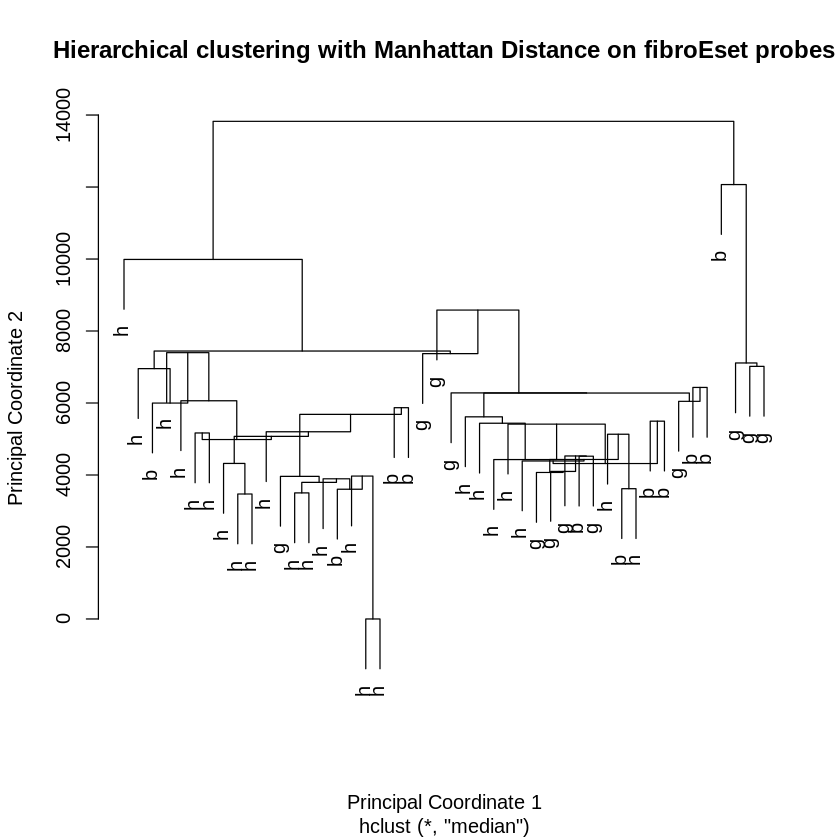

In [ ]:
# mdist = dist(dat, method = "manhattan")
# hclust_med <- hclust(mdist, method = 'median')
# plot(hclust_med, xlab="Principal Coordinate 1", ylab="Principal Coordinate 2", 
# main ='Hierarchical clustering with Manhattan Distance on fibroEset probes')

mdist = dist(t(dat), method = "manhattan")
hclust_med <- hclust(mdist, method = 'median')
plot(hclust_med, xlab="Principal Coordinate 1", ylab="Principal Coordinate 2", 
main ='Hierarchical clustering with Manhattan Distance on fibroEset probes')

4)	Now both run hierarchical clustering and plot the results in two dimensions (on samples and genes).  Plot a heatmap with the genes on the y-axis and samples on the x-axis.  Once again, make sure that the sample and genes labels are present.  Title the plot.

In [ ]:
library(repr)

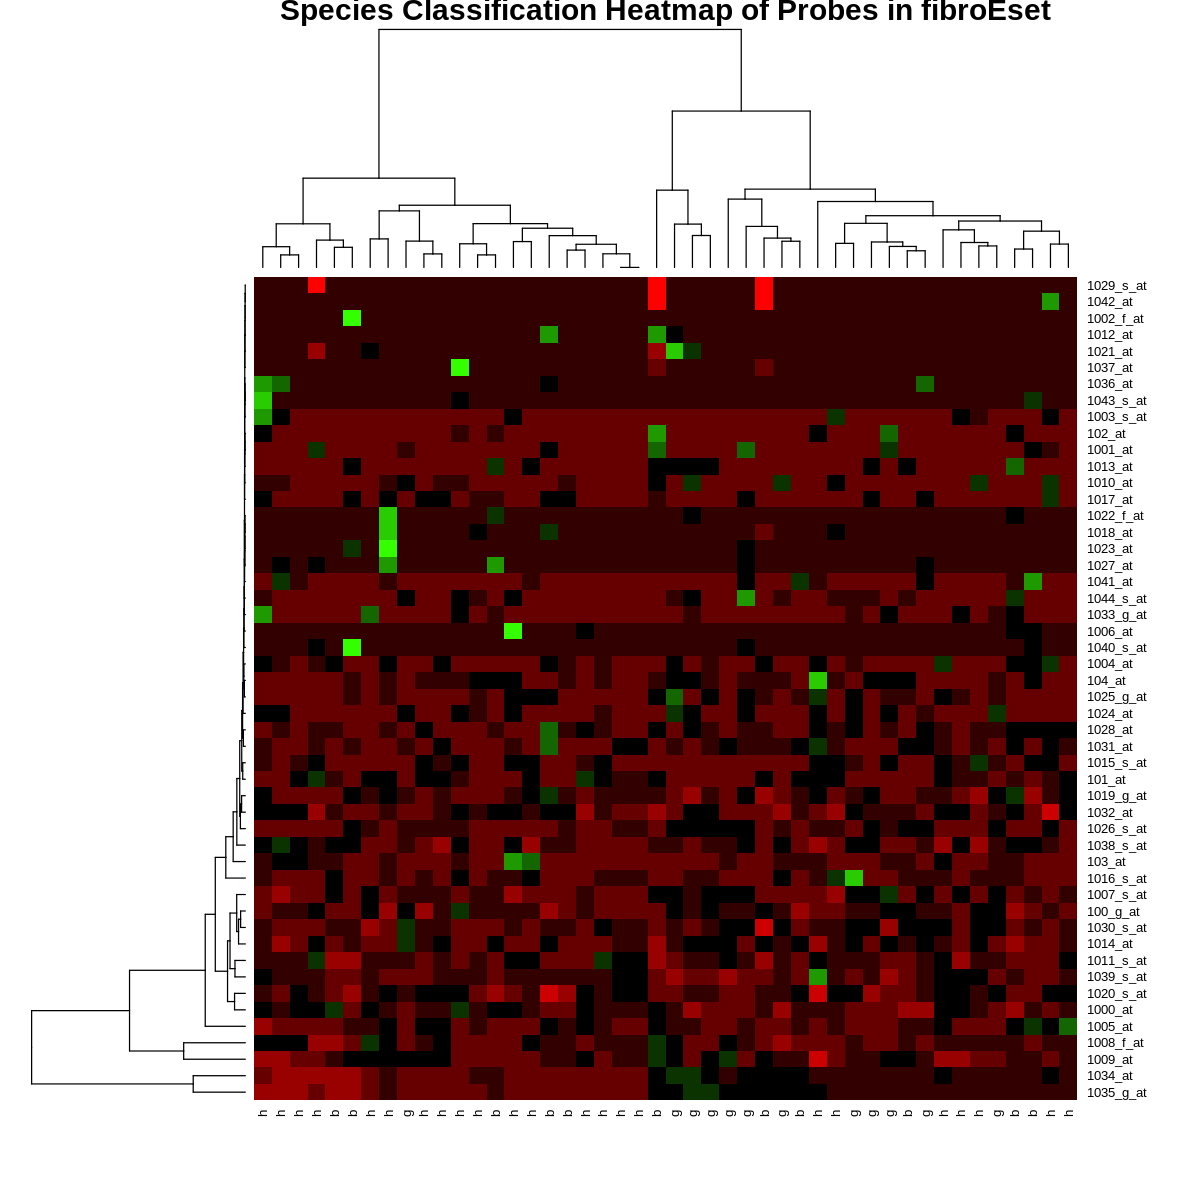

In [ ]:
hm.rg <- c("#FF0000","#CC0000","#990000","#660000","#330000","#000000","#000000","#0A3300","#146600","#1F9900","#29CC00","#33FF00")
mdist = dist(dat, method = "euclidean")
options(repr.plot.width=10, repr.plot.height=10)
heatmap(as.matrix(dat),col=hm.rg, mdist, main='Species Classification Heatmap of Probes in fibroEset')

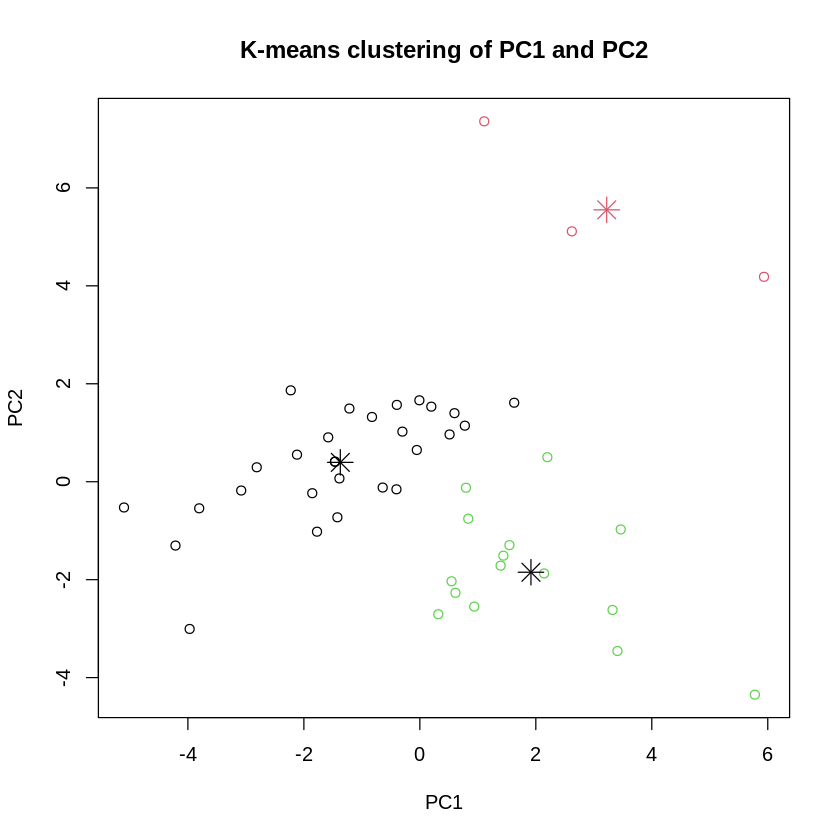

In [ ]:
dat.pca <- prcomp(t(dat),scale=T)
dat.loadings <- dat.pca$x[,1:2]
cl <- kmeans(dat.loadings, centers=3, iter.max=20)
plot(dat.loadings, col = cl$cluster,cex=1, main="K-means clustering of PC1 and "PC2)
points(cl$centers, col = 1:2, pch = 8, cex = 2)

5)	Calculate PCA on the samples and retain the first two components vectors (eigenfunctions).  Calculate k-means clustering on these first two components with k=3.

In [ ]:
install.packages('kernlab')
library(kernlab)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
dat.kpca <- kpca(as.matrix(dat), kernel="rbfdot", kpar=list(sigma=0.002))# , features=2
dat.kpca@eig

Comp.1     Comp.2     Comp.3     Comp.4     Comp.5     Comp.6     Comp.7 
0.03070183 0.02000515 0.02000221 0.02000191 0.02000000 0.02000000 0.02000000 
    Comp.8     Comp.9    Comp.10    Comp.11    Comp.12    Comp.13    Comp.14 
0.02000000 0.02000000 0.02000000 0.02000000 0.02000000 0.02000000 0.02000000 
   Comp.15    Comp.16    Comp.17    Comp.18    Comp.19    Comp.20    Comp.21 
0.02000000 0.02000000 0.02000000 0.02000000 0.02000000 0.02000000 0.02000000 
   Comp.22    Comp.23    Comp.24    Comp.25    Comp.26    Comp.27    Comp.28 
0.02000000 0.02000000 0.02000000 0.02000000 0.02000000 0.02000000 0.02000000 
   Comp.29    Comp.30    Comp.31    Comp.32    Comp.33    Comp.34    Comp.35 
0.02000000 0.02000000 0.02000000 0.02000000 0.02000000 0.02000000 0.02000000 
   Comp.36    Comp.37    Comp.38    Comp.39    Comp.40    Comp.41    Comp.42 
0.02000000 0.02000000 0.02000000 0.02000000 0.02000000 0.02000000 0.02000000 
   Comp.43    Comp.44    Comp.45    Comp.46    Comp.47    Comp.48    Comp.49 
0.02000000 0.02000000 0.01999939 0.01999767 0.01999461 0.01983912 0.00893411

In [ ]:
feats2 = dat.kpca@rotated[, 1:2]
head(feats2)

100_g_at,-0.2745346,-0.21972496
1000_at,-0.2745346,-0.21972496
1001_at,-0.2745571,-0.19806122
1002_f_at,0.8006779,0.00826161
1003_s_at,-0.2745390,-0.04920407
1004_at,-0.2745346,-0.21972496


In [ ]:
feats2 = as.data.frame(feats2)
head(feats2)

,V1,V2
,<dbl>,<dbl>
100_g_at,-0.2745346,-0.21972496
1000_at,-0.2745346,-0.21972496
1001_at,-0.2745571,-0.19806122
1002_f_at,0.8006779,0.00826161
1003_s_at,-0.2745390,-0.04920407
1004_at,-0.2745346,-0.21972496


In [ ]:
cl <- kmeans(feats2, 3)

In [ ]:
cl$cluster

100_g_at   1000_at   1001_at 1002_f_at 1003_s_at   1004_at   1005_at   1006_at 
        3         3         3         3         3         3         3         3 
1007_s_at 1008_f_at   1009_at    101_at   1010_at 1011_s_at   1012_at   1013_at 
        3         3         3         3         3         3         3         3 
  1014_at 1015_s_at 1016_s_at   1017_at   1018_at 1019_g_at    102_at 1020_s_at 
        3         3         3         3         3         3         3         3 
  1021_at 1022_f_at   1023_at   1024_at 1025_g_at 1026_s_at   1027_at   1028_at 
        3         3         3         3         3         3         3         3 
1029_s_at    103_at 1030_s_at   1031_at   1032_at 1033_g_at   1034_at 1035_g_at 
        1         3         3         3         3         3         3         3 
  1036_at   1037_at 1038_s_at 1039_s_at    104_at 1040_s_at   1041_at   1042_at 
        2         3         3         3         3         3         3         1 
1043_s_at 1044_s_at 
        2         3

In [ ]:
feats2[, 2]

[1] -0.219724962 -0.219724962 -0.198061217  0.008261610 -0.049204074
 [6] -0.219724962 -0.219724962 -0.219724962 -0.219724962 -0.219724962
[11] -0.219724962 -0.219724962 -0.219724962 -0.219724962  0.102290201
[16] -0.219757046 -0.219724962 -0.219724962 -0.219724962 -0.219724962
[21] -0.406701588 -0.219724962 -0.220153382 -0.219724962 -0.221568104
[26] -0.408231711 -0.225866819 -0.219724962 -0.219724962 -0.219724962
[31] -0.231247145 -0.219724962 -0.002565825 -0.219724962 -0.219724962
[36] -0.219724962 -0.219724962 -0.219724962 -0.219724962 -0.219724962
[41]  4.884100660 -0.219559833 -0.219724962 -0.219724962 -0.219724962
[46] -0.219724962 -0.219724934 -0.003110092  4.882023051 -0.219724962

In [ ]:
feats2$class = cl$cluster

In [ ]:
head(feats2[, 1:2])

,V1,V2
,<dbl>,<dbl>
100_g_at,-0.2745346,-0.21972496
1000_at,-0.2745346,-0.21972496
1001_at,-0.2745571,-0.19806122
1002_f_at,0.8006779,0.00826161
1003_s_at,-0.2745390,-0.04920407
1004_at,-0.2745346,-0.21972496


In [ ]:
unique(feats2$class)

[1] 3 1 2

6)	Plot a two-dimensional scatter plot of the sample classification labels, embedded with the first two eigenfunctions (from PCA).  Color the labels with the color that corresponds to the predicted cluster membership.  Make sure to label the axes and title the plot.

In [ ]:
BiocManager::install('multtest')

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 (2022-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'multtest'”
Old packages: 'devtools', 'evaluate', 'ggplot2', 'lubridate', 'rmarkdown',
  'roxygen2', 'tibble', 'tidyverse', 'foreign'



In [ ]:
BiocManager::install('MASS')

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 (2022-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'MASS'”
Old packages: 'devtools', 'evaluate', 'ggplot2', 'lubridate', 'rmarkdown',
  'roxygen2', 'tibble', 'tidyverse', 'foreign'



In [ ]:
library(MASS); library(multtest);

In [ ]:
feats2[feats2['class'] == 1, 'class'] = 'red'
feats2[feats2['class'] == 2, 'class'] = 'blue'
feats2[feats2['class'] == 3, 'class'] = 'green'

head(feats2)

,V1,V2,class
,<dbl>,<dbl>,<chr>
100_g_at,-0.2745346,-0.21972496,green
1000_at,-0.2745346,-0.21972496,green
1001_at,-0.2745571,-0.19806122,green
1002_f_at,0.8006779,0.00826161,green
1003_s_at,-0.2745390,-0.04920407,green
1004_at,-0.2745346,-0.21972496,green


In [ ]:
colnames(feats2)[1] = 'PC1'
colnames(feats2)[2] = 'PC2'
head(feats2)

,PC1,PC2,class
,<dbl>,<dbl>,<chr>
100_g_at,-0.2745346,-0.21972496,green
1000_at,-0.2745346,-0.21972496,green
1001_at,-0.2745571,-0.19806122,green
1002_f_at,0.8006779,0.00826161,green
1003_s_at,-0.2745390,-0.04920407,green
1004_at,-0.2745346,-0.21972496,green


In [ ]:
unique(feats2$class)

[1] "green" "red"   "blue"

In [ ]:
table(feats2$class)


 blue green   red 
    2    46     2 

In [ ]:
dim(feats2)

[1] 50  3

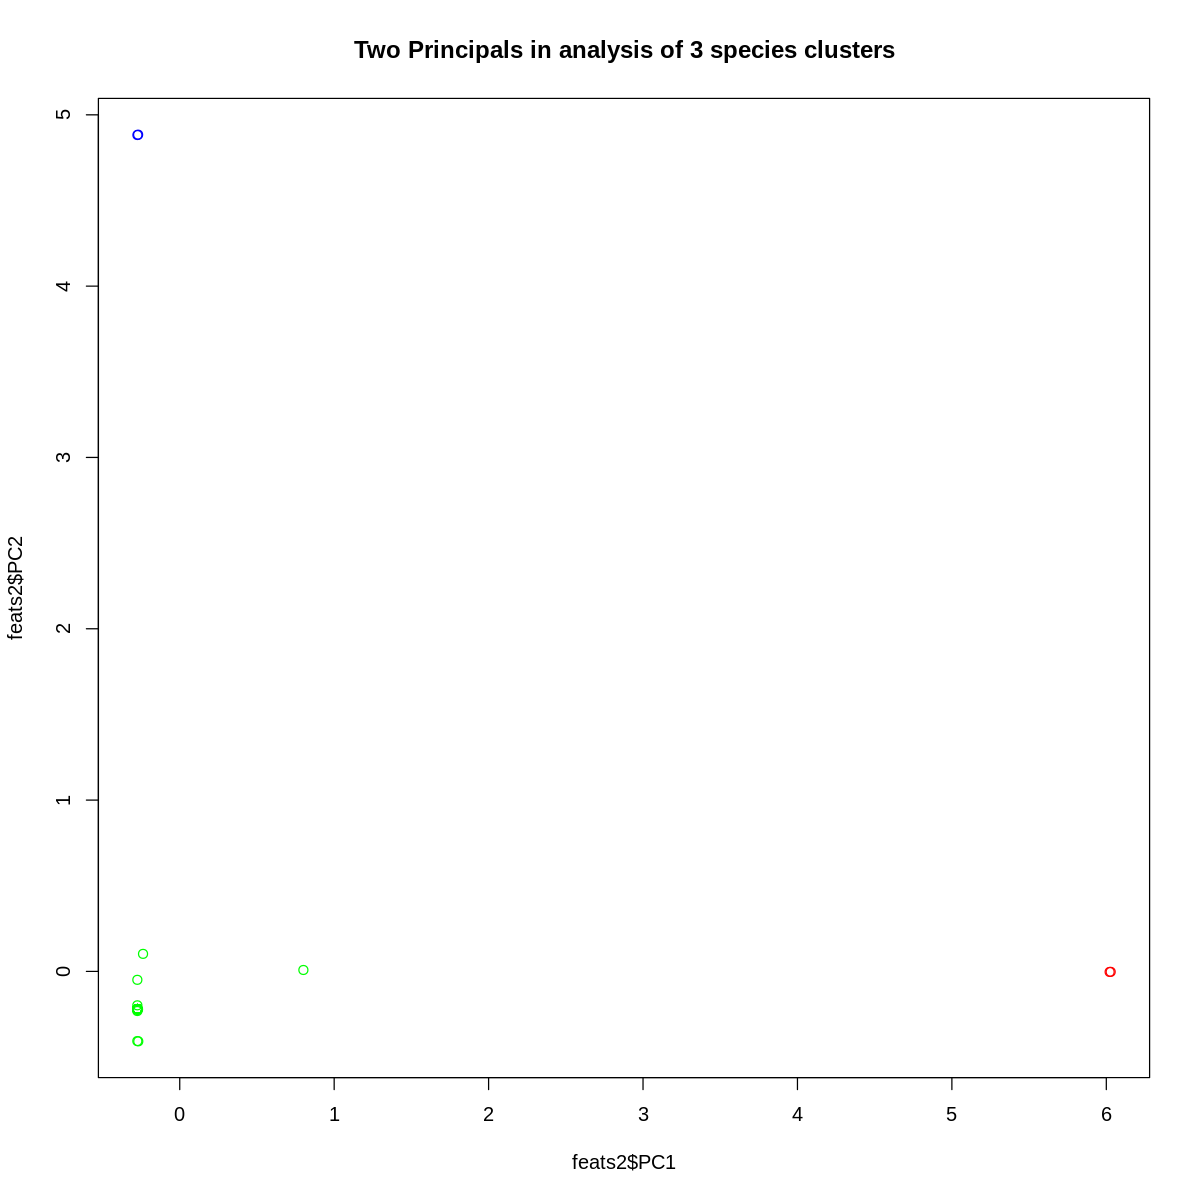

In [ ]:
plot(x = feats2$PC1, y = feats2$PC2, col = feats2$class, main='Two Principals in analysis of 3 species clusters')